In [38]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt 
from keras.layers import Dense
from keras.regularizers import l2
import tensorflow as tf

In [39]:
from keras.models import Sequential

In [40]:
from keras.layers.recurrent import LSTM
from keras.layers import Dense

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode = "min", restore_best_weights = True)


In [68]:
data_std = pd.read_csv("data/final/1min/BidAsk/BTC_std.csv")
Y = pd.read_csv("data/final/1min/BTC_Y_std.csv")

def CreateData_LSTM(data_std, Y, val_split, test_split):
    r,x = data_std.shape
    data = data_std.values.reshape((1, r, x))
    Y_std = Y.values.reshape((1,r,1))
    
    train_lstm = data[:,:val_split,:]
    val_lstm = data[:,14000:15500,:]
    #val_lstm = data[:,:test_split,:]
    test_lstm = data[:,15500:,:]
    #test_lstm = data[:,:,:]
    
    Y_train_lstm = Y_std[:,:val_split,:]
    Y_val_lstm = Y_std[:,14000:15500,:]
    #Y_val_lstm = Y_std[:,:test_split,:]
    Y_test_lstm = Y_std[:,15500:,:]
    #Y_test_lstm = Y_std[:,:,:]


    return train_lstm, val_lstm, test_lstm, Y_train_lstm, Y_val_lstm, Y_test_lstm
    
    

In [69]:
def LSTM_Model_1(train_lstm, Y_train_lstm, val_lstm, Y_val_lstm, x, EP):

    model = Sequential()
    model.add(LSTM(16, input_shape=(None, x), return_sequences = True))
    model.add(Dense(3, activation = "softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    history = model.fit(train_lstm, Y_train_lstm, epochs=25, validation_data = (val_lstm, Y_val_lstm), verbose = 1, callbacks=[callback])


    return history, model
    

In [71]:
train_lstm, val_lstm, test_lstm, Y_train_lstm, Y_val_lstm, Y_test_lstm = CreateData_LSTM(data_std,Y, 14000, 15500)

In [46]:
train_lstm.shape

(1, 14000, 33)

In [47]:
val_weight = Y_val_lstm

In [49]:
val_weight = val_weight.reshape((1,15500))

In [50]:
val_weight.shape

(1, 15500)

In [52]:
val_weight[:,:14000] = 0
val_weight[:,14000:] = 1

In [54]:
val_weight.shape

(1, 15500)

In [57]:
r,c,x = train_lstm.shape

In [72]:
history, model = LSTM_Model_1(train_lstm, Y_train_lstm, val_lstm, Y_val_lstm, x, 25)

Epoch 1/25
1/1 [==============================] - 4s 4s/step - loss: 1.0896 - accuracy: 0.3889 - val_loss: 1.0945 - val_accuracy: 0.3600
Epoch 2/25
1/1 [==============================] - 2s 2s/step - loss: 1.0813 - accuracy: 0.4138 - val_loss: 1.0885 - val_accuracy: 0.3860
Epoch 3/25
1/1 [==============================] - 4s 4s/step - loss: 1.0732 - accuracy: 0.4363 - val_loss: 1.0831 - val_accuracy: 0.3967
Epoch 4/25
1/1 [==============================] - 6s 6s/step - loss: 1.0655 - accuracy: 0.4573 - val_loss: 1.0780 - val_accuracy: 0.4113
Epoch 5/25
1/1 [==============================] - 8s 8s/step - loss: 1.0582 - accuracy: 0.4724 - val_loss: 1.0735 - val_accuracy: 0.4247
Epoch 6/25
1/1 [==============================] - 10s 10s/step - loss: 1.0511 - accuracy: 0.4900 - val_loss: 1.0695 - val_accuracy: 0.4307
Epoch 7/25
1/1 [==============================] - 7s 7s/step - loss: 1.0444 - accuracy: 0.5044 - val_loss: 1.0659 - val_accuracy: 0.4373
Epoch 8/25
1/1 [=======================

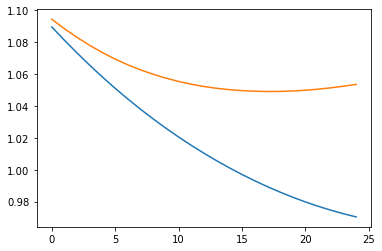

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [74]:
model.predict_classes(test_lstm)

/Users/martin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0, 0, 0, ..., 1, 0, 0]])

In [75]:
pred = np.argmax(model.predict(test_lstm), axis=-1)

In [76]:
pred.shape

(1, 1548)

In [476]:
pred[0,15500:]

array([0, 0, 0, ..., 0, 0, 0])

In [477]:
pred[0,15500:] = Y_std[15500:]

ValueError: could not broadcast input array from shape (0,17048,1) into shape (1548)

In [27]:
.shape

(1, 17048, 1)

In [77]:
sum(pred[0,15500:] == Y_std[0,15500:,0])/1548

NameError: name 'Y_std' is not defined

In [482]:
pred[0,15500:].shape

(1548,)

In [488]:
model.predict(test_lstm)

array([[[0.3019536 , 0.30216908, 0.39587733],
        [0.3249775 , 0.3002733 , 0.37474924],
        [0.36323813, 0.2354124 , 0.40134948],
        ...,
        [0.47215974, 0.2899163 , 0.23792394],
        [0.5255605 , 0.2540053 , 0.22043416],
        [0.53964335, 0.27854082, 0.18181585]]], dtype=float32)

In [318]:
model.predict_classes(test_lstm)

array([[0, 0, 0, ..., 0, 0, 0]])

In [247]:
Y_test_lstm[:,1:10,:]

array([[[2],
        [2],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [1]]])

In [79]:
pred = np.argmax(model.predict(test_lstm), axis=-1)

In [80]:
pred.shape

(1, 1548)

In [489]:
pred = model.predict(test_lstm)

In [78]:
pred

array([[0, 0, 0, ..., 1, 0, 0]])

In [258]:
pred[0,:]

array([0, 0, 0, ..., 0, 0, 0])

In [282]:
np.bincount(pred[0,:])

array([1308])

In [263]:
pred.shape

(1, 1308)

In [262]:
np.nonzero(pred[0,:])

(array([], dtype=int64),)

In [491]:
import sklearn
from sklearn.metrics import roc_auc_score

In [502]:
pred.shape

(1, 17048, 3)

In [506]:
pred[:,15500:,:].reshape((1548,3))

array([[0.5524039 , 0.23740539, 0.21019068],
       [0.5160029 , 0.22005287, 0.2639443 ],
       [0.44032782, 0.2586724 , 0.3009998 ],
       ...,
       [0.47215974, 0.2899163 , 0.23792394],
       [0.5255605 , 0.2540053 , 0.22043416],
       [0.53964335, 0.27854082, 0.18181585]], dtype=float32)

In [505]:
pred[:,15500,:]

array([[0.5524039 , 0.23740539, 0.21019068]], dtype=float32)

In [507]:
roc_auc_score(pd.get_dummies(Y_std[:,15500:,:].reshape(1548)), pred[:,15500:,:].reshape((1548,3)), multi_class="ovo")

0.555808694724654

In [496]:
Y_std.shape

(1, 17048, 1)